In [1]:
# 📊 Day 11: Hypothesis Testing (z, t, chi-squared)
# Author: David Caleb Chaparro Orozco
# Topic: Performing and Visualizing Hypothesis Tests (z-test, t-test, chi-squared)

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Create outputs directory if it doesn't exist
os.makedirs("outputs", exist_ok=True)
os.makedirs("data", exist_ok=True)

## 1. Generate and Save Datasets

In [2]:
# Generate and save dataset
def generate_datasets():
    # Heights dataset for z-test/t-test
    np.random.seed(42)
    heights_male = np.random.normal(loc=175, scale=7, size=200)
    heights_female = np.random.normal(loc=162, scale=6, size=200)
    heights_data = pd.DataFrame({
        'height': np.concatenate([heights_male, heights_female]),
        'gender': ['male']*200 + ['female']*200
    })
    heights_data.to_csv('data/heights_sample.csv', index=False)

    # Sales before/after campaign for paired t-test
    np.random.seed(42)
    sales_before = np.random.normal(loc=500, scale=50, size=100)
    sales_after = sales_before + np.random.normal(loc=30, scale=20, size=100)
    sales_data = pd.DataFrame({
        'before': sales_before,
        'after': sales_after
    })
    sales_data.to_csv('data/sales_before_after.csv', index=False)

    # Contingency table for chi-squared test
    contingency_data = {
        'Product': ['A','B','C','D'],
        'NY': [150, 70, 60, 120],
        'CA': [100, 90, 110, 95],
        'TX': [130, 80, 70, 140]
    }
    
    contingency_data = pd.DataFrame(contingency_data)
    contingency_data.to_csv('data/contingency_table.csv', index=False)

generate_datasets()

## 2. Load and Explore Datasets

In [3]:
# Load datasets
heights = pd.read_csv('data/heights_sample.csv')
sales = pd.read_csv('data/sales_before_after.csv')
contingency = pd.read_csv('data/contingency_table.csv')

In [4]:
# Display sample data
print("=".center(50,"="))
print("Heights Data Sample:")
print(heights.head())
print("=".center(50,"="))
print("\nSales Data Sample:")
print(sales.head())
print("=".center(50,"="))
print("\nContingency Table:")
print(contingency)
print("=".center(50,"="))

Heights Data Sample:
       height gender
0  178.476999   male
1  174.032150   male
2  179.533820   male
3  185.661209   male
4  173.360926   male

Sales Data Sample:
       before       after
0  524.835708  526.528293
1  493.086785  514.673878
2  532.384427  555.530137
3  576.151493  590.105947
4  488.292331  515.066617

Contingency Table:
  Product   NY   CA   TX
0       A  150  100  130
1       B   70   90   80
2       C   60  110   70
3       D  120   95  140


## 3. Visualization of Data Distributions

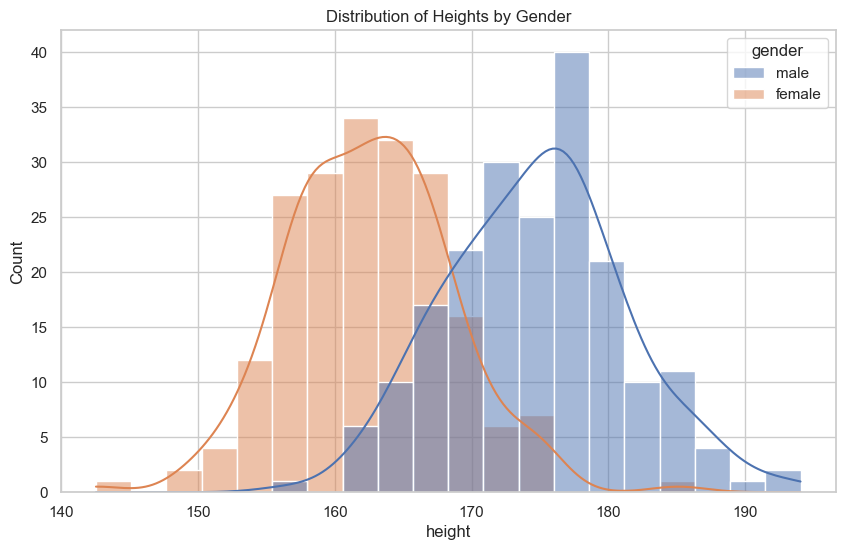

In [5]:
# Heights distribution by gender
plt.figure()
sns.histplot(data=heights, x='height', hue='gender', kde=True, bins=20)
plt.title('Distribution of Heights by Gender')
plt.savefig('outputs/height_distribution.png')
plt.show()

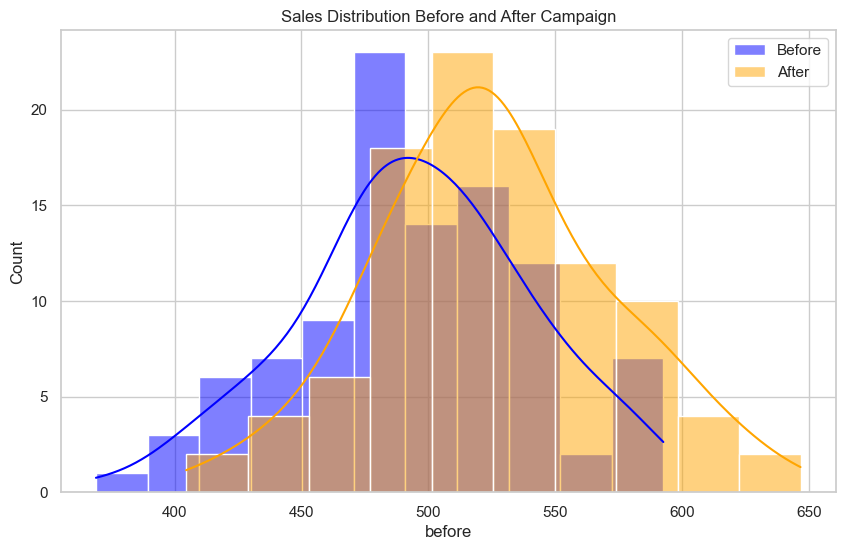

In [6]:
# Sales before vs after
plt.figure()
sns.histplot(sales['before'], color='blue', label='Before', kde=True)
sns.histplot(sales['after'], color='orange', label='After', kde=True)
plt.title('Sales Distribution Before and After Campaign')
plt.legend()
plt.savefig('outputs/sales_distribution.png')
plt.show()

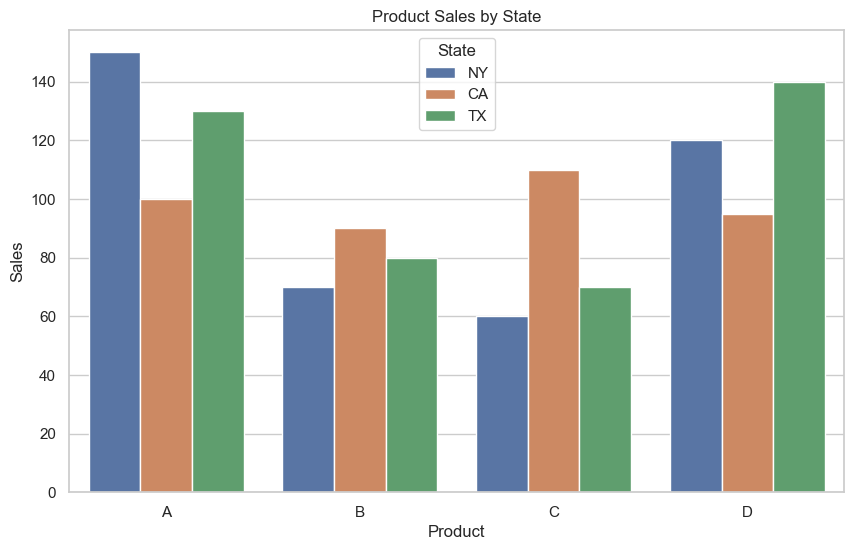

In [7]:
# Contingency table visualization
contingency_melted = contingency.melt(id_vars='Product', var_name='State', value_name='Sales')
plt.figure()
sns.barplot(data=contingency_melted, x='Product', y='Sales', hue='State')
plt.title('Product Sales by State')
plt.savefig('outputs/product_sales_by_state.png')
plt.show()

## 4. Hypothesis Testing Examples

### 4.1 Z-Test: Compare sample mean to population mean

Tests if sample mean differs from population mean when population SD is known.

In [8]:
# Assume population mean height = 170, std = 25
pop_mean = 170
pop_std = 25
sample_mean = heights['height'].mean()
n = len(heights)

# Calculate z-score
z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"\nZ-Test Results:")
print(f"Sample mean: {sample_mean:.2f}")
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")


Z-Test Results:
Sample mean: 168.61
Z-score: -1.11
P-value: 0.2678


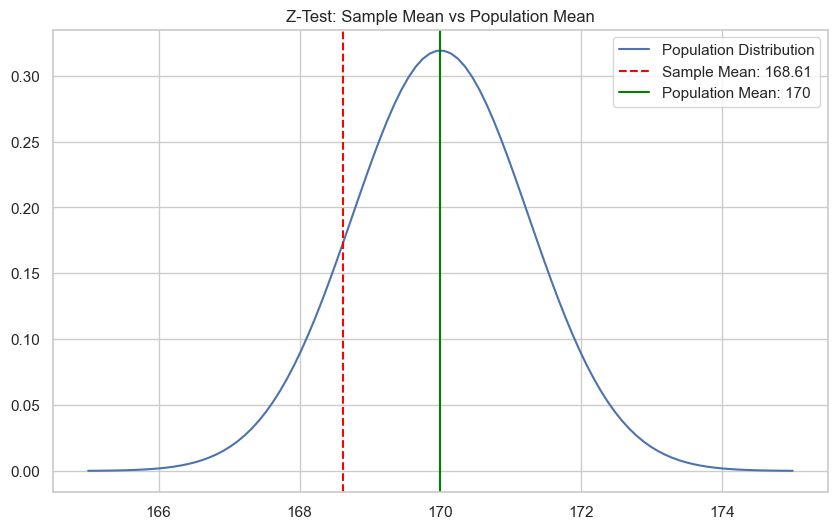

In [9]:
plt.figure()
x = np.linspace(pop_mean - 4*pop_std/np.sqrt(n), pop_mean + 4*pop_std/np.sqrt(n), 100)
y = stats.norm.pdf(x, loc=pop_mean, scale=pop_std/np.sqrt(n))
plt.plot(x, y, label='Population Distribution')
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Sample Mean: {sample_mean:.2f}')
plt.axvline(pop_mean, color='green', linestyle='-', label=f'Population Mean: {pop_mean}')
plt.title('Z-Test: Sample Mean vs Population Mean')
plt.legend()
plt.savefig('outputs/z_test_visualization.png')
plt.show()

**Like checking if a new basketball team matches the league average**  
- We know the league's average height (170cm) and typical variation  
- Compare our team's average to the known benchmark  
- The z-score measures how many "standard deviations" we're off  

### 4.2 T-Test: Compare two independent groups (male vs female heights)

Compares means of two independent groups with unknown but equal variances.  

In [10]:
male_heights = heights[heights['gender'] == 'male']['height']
female_heights = heights[heights['gender'] == 'female']['height']

t_stat, p_value = stats.ttest_ind(male_heights, female_heights)

print(f"\nIndependent T-Test Results:")
print(f"Male mean height: {male_heights.mean():.2f}")
print(f"Female mean height: {female_heights.mean():.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")


Independent T-Test Results:
Male mean height: 174.71
Female mean height: 162.52
T-statistic: 19.59
P-value: 0.0000


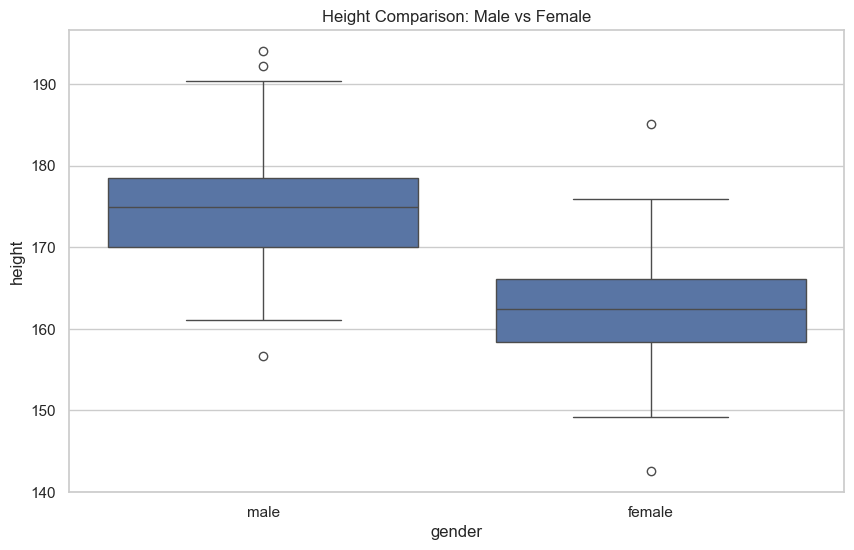

In [11]:
plt.figure()
sns.boxplot(data=heights, x='gender', y='height')
plt.title('Height Comparison: Male vs Female')
plt.savefig('outputs/t_test_visualization.png')
plt.show()

**Like comparing apples from two different orchards**  
- We measure average weight from Farm A vs Farm B  
- Don't assume we know the natural weight variation  
- Determines if observed difference is meaningful  

### 4.3 Paired T-Test: Sales before vs after

Compares means from the same group at different times.  

In [12]:
t_stat, p_value = stats.ttest_rel(sales['before'], sales['after'])

print(f"\nPaired T-Test Results:")
print(f"Mean sales before: {sales['before'].mean():.2f}")
print(f"Mean sales after: {sales['after'].mean():.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")



Paired T-Test Results:
Mean sales before: 494.81
Mean sales after: 525.25
T-statistic: -15.96
P-value: 0.0000


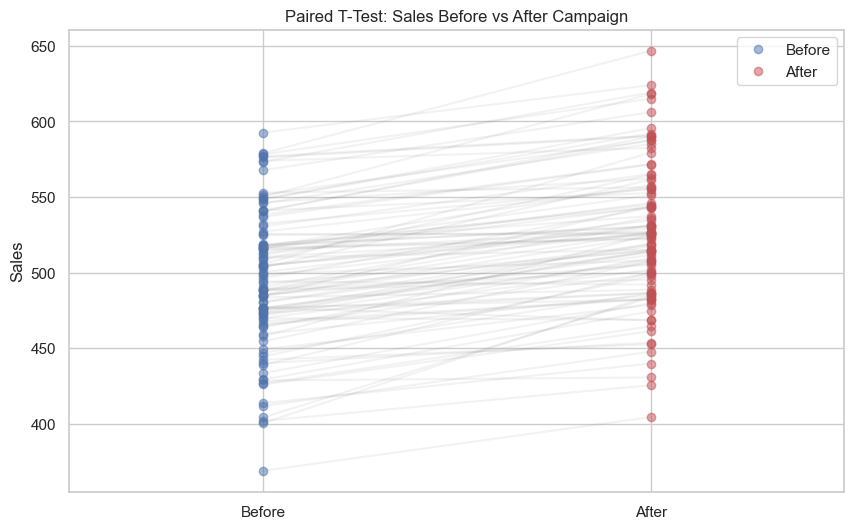

In [13]:
plt.figure()
plt.plot([1]*100, sales['before'], 'bo', label='Before', alpha=0.5)
plt.plot([2]*100, sales['after'], 'ro', label='After', alpha=0.5)
for i in range(100):
    plt.plot([1, 2], [sales['before'][i], sales['after'][i]], 'gray', alpha=0.1)
plt.xlim(0.5, 2.5)
plt.xticks([1, 2], ['Before', 'After'])
plt.ylabel('Sales')
plt.title('Paired T-Test: Sales Before vs After Campaign')
plt.legend()
plt.savefig('outputs/paired_t_test_visualization.png')
plt.show()

**Like before/after weigh-ins at a fitness camp**  
- Measures each participant twice  
- Focuses on individual progress, not group averages  
- Accounts for personal baseline differences  

### 4.4 Chi-Squared Test: Product preference across states

Tests independence between categorical variables.  

In [14]:
# Prepare contingency table
contingency_table = contingency.set_index('Product').values

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-Squared Test Results:")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)


Chi-Squared Test Results:
Chi2 statistic: 38.26
P-value: 0.0000
Degrees of freedom: 6

Expected frequencies:
[[125.10288066 123.53909465 131.35802469]
 [ 79.01234568  78.02469136  82.96296296]
 [ 79.01234568  78.02469136  82.96296296]
 [116.87242798 115.41152263 122.71604938]]


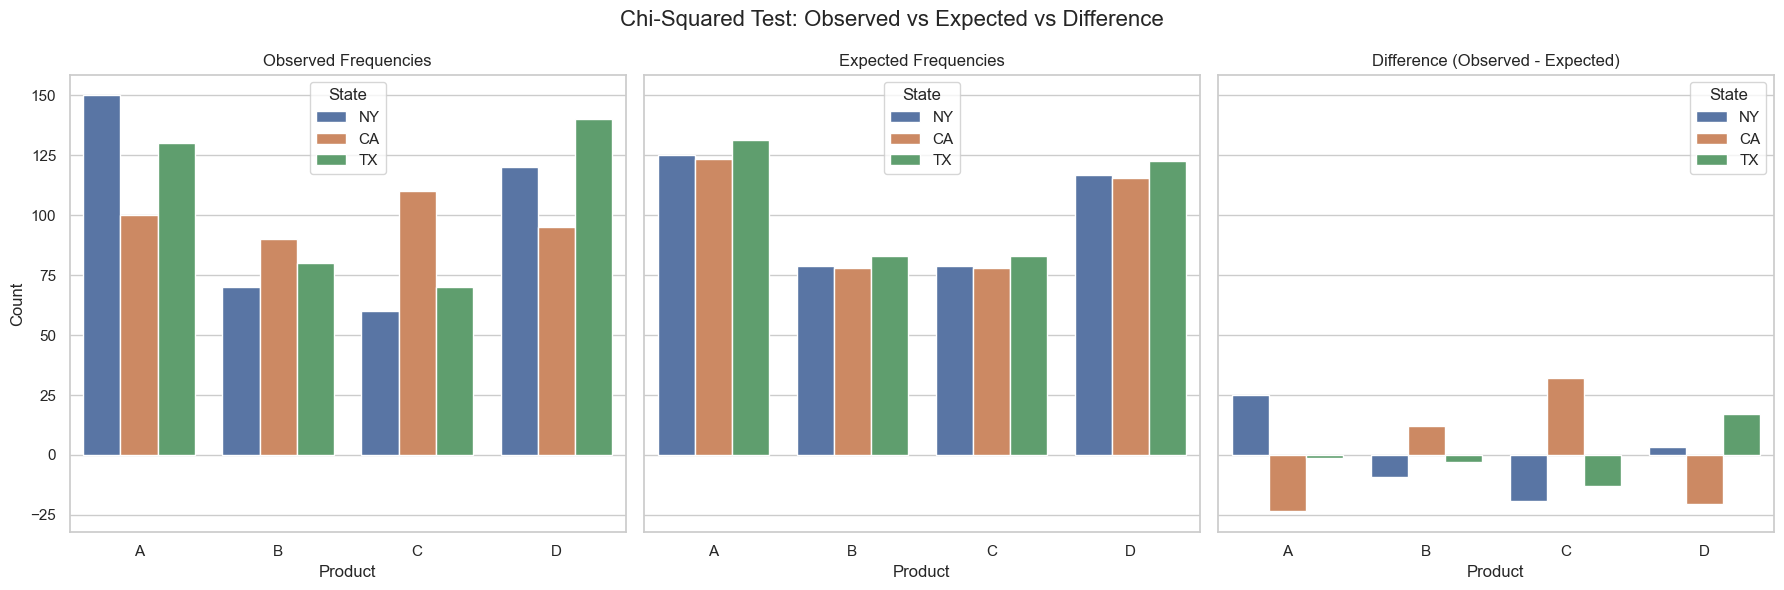

In [15]:
# Convert expected frequencies into a DataFrame for better handling
expected_data = pd.DataFrame(
    expected,
    index=contingency['Product'],
    columns=contingency.columns[1:]
).reset_index()

# Calculate the difference (Observed - Expected)
difference_data = contingency.copy()
difference_data[['NY', 'CA', 'TX']] = (
    contingency[['NY', 'CA', 'TX']] - expected_data[['NY', 'CA', 'TX']]
)

# Melt data for plotting (long format)
obs_melted = contingency.melt(id_vars='Product', var_name='State', value_name='Count')
exp_melted = expected_data.melt(id_vars='Product', var_name='State', value_name='Count')
diff_melted = difference_data.melt(id_vars='Product', var_name='State', value_name='Count')

# Plot side-by-side: Observed, Expected, and Difference
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(data=obs_melted, x='Product', y='Count', hue='State', ax=axes[0])
axes[0].set_title('Observed Frequencies')
axes[0].set_ylabel('Count')

sns.barplot(data=exp_melted, x='Product', y='Count', hue='State', ax=axes[1])
axes[1].set_title('Expected Frequencies')
axes[1].set_ylabel('Count')

sns.barplot(data=diff_melted, x='Product', y='Count', hue='State', ax=axes[2])
axes[2].set_title('Difference (Observed - Expected)')
axes[2].set_ylabel('Count')

# Main title and layout
fig.suptitle('Chi-Squared Test: Observed vs Expected vs Difference', fontsize=16)
plt.tight_layout()
plt.savefig('outputs/chi_squared_observed_expected_difference.png')
plt.show()


**Like checking if ice cream flavor preference changes by city**  
- Compare actual sales (observed) to what we'd expect if preference was random  
- Large differences = flavor preference depends on location  
- Small differences = preferences are consistent everywhere  

---
# Testing hypothesis_utils.py
---

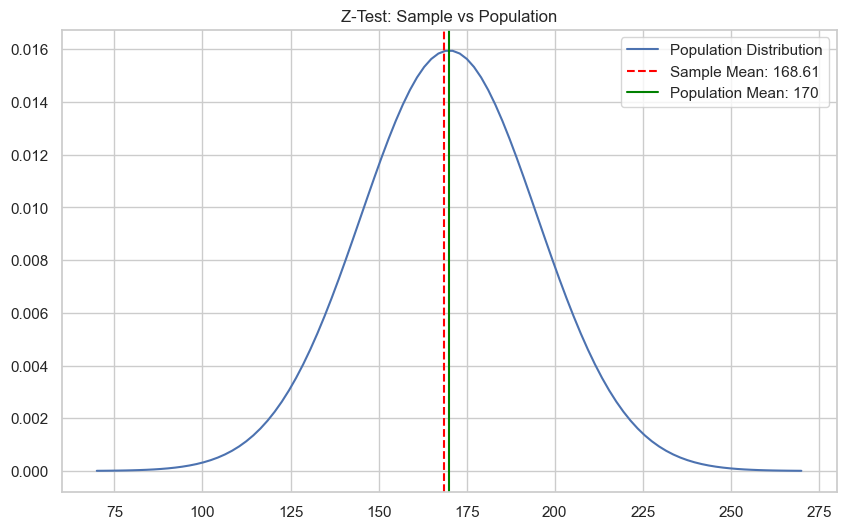

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day11_Hypothesis_Testing\hypothesis_utils.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


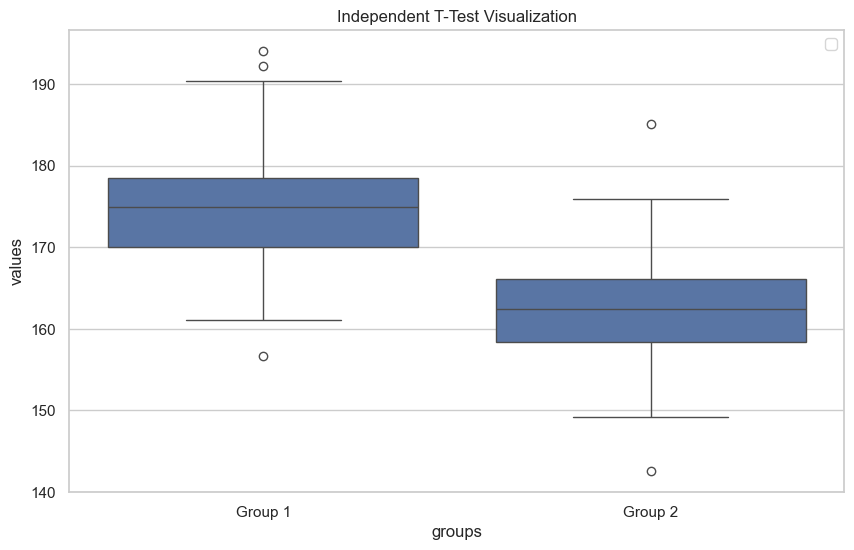

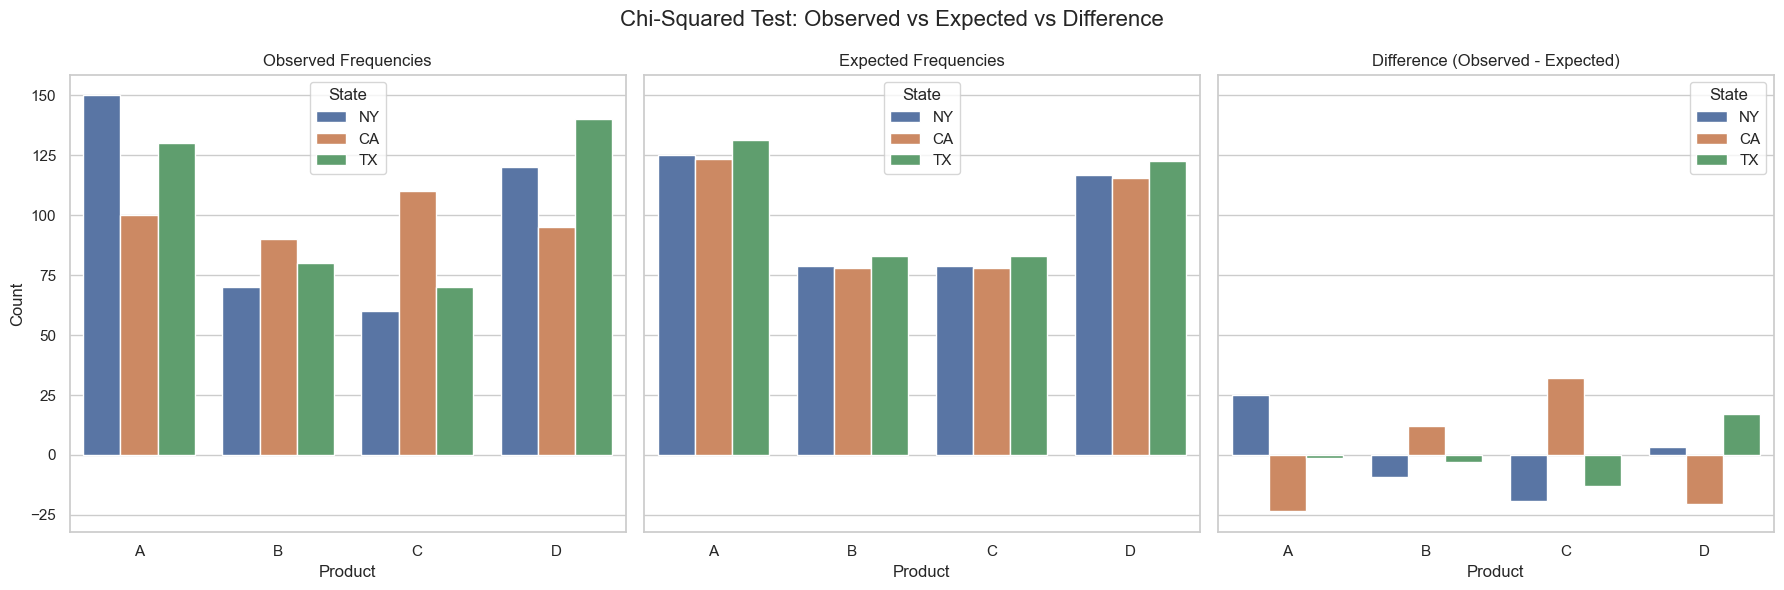

In [16]:
from hypothesis_utils import *

# Generate data
heights, sales, contingency = generate_datasets()

# Z-test example
z, p = perform_ztest(heights['height'], pop_mean=170, pop_std=25)

# T-test example
t, p = perform_ttest(heights[heights['gender']=='male']['height'],
                        heights[heights['gender']=='female']['height'])

# Chi-squared test
chi2, p, dof, expected = perform_chi2_test(contingency)